In [10]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

(-3.0, 3.0, -3.0, 3.0)

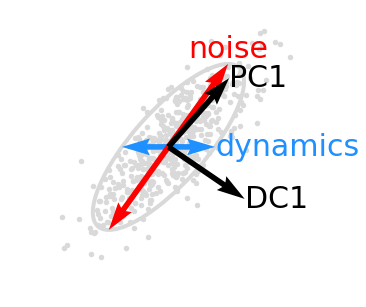

In [422]:
theta = np.deg2rad(55)
sig_var = 1.
noise_var = 5.

v_sig = np.array([1, 0])
v_noise = np.array([np.cos(theta), np.sin(theta)])

cov_sig = sig_var * np.outer(v_sig, v_sig)
cov_noise = noise_var * np.outer(v_noise, v_noise)
cov = cov_sig + cov_noise

w, V = scipy.linalg.eigh(cov)
w, V = w[::-1], V[:, ::-1]
if V[0, 0] < 0:
    V *= -1
theta_prime = np.abs(np.arccos(V[0, 0]))
theta_prime = np.minimum(theta_prime, np.pi - theta_prime)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
elipse_color = "0.85"
ellipse = Ellipse((0, 0),
                  facecolor="white",
                  edgecolor=elipse_color,
                  width=2 * np.sqrt(w[0]),
                  height=2 * np.sqrt(w[1]),
                  angle=np.rad2deg(theta_prime),
                  linewidth=4,
                  alpha=1.0, linestyle="-",
                  zorder=0)
ax.add_patch(ellipse)
#ax.set_aspect(1.0)

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

pts = np.random.multivariate_normal(mean=np.zeros(2), cov=cov/4, size=500)
ax.scatter(pts[:, 0], pts[:, 1], c=elipse_color, s=20)

colors = ["#1E67A0", "#0C9852", "#C84182"]
sig_color = "dodgerblue" #colors[1]
noise_color = "red" #colors[2]

width = 0.02

ax.quiver(0, 0, np.sqrt(sig_var)*v_sig[0], np.sqrt(sig_var)*v_sig[1], angles='xy', scale_units='xy', scale = 1, color=sig_color, width=width)
ax.quiver(0, 0, -np.sqrt(sig_var)*v_sig[0], -np.sqrt(sig_var)*v_sig[1], angles='xy', scale_units='xy', scale = 1, color=sig_color, width=width)
ax.quiver(0, 0, np.sqrt(noise_var)*v_noise[0], np.sqrt(noise_var)*v_noise[1], angles='xy', scale_units='xy', scale = 1, color=noise_color, width=width)
ax.quiver(0, 0, -np.sqrt(noise_var)*v_noise[0], -np.sqrt(noise_var)*v_noise[1], angles='xy', scale_units='xy', scale = 1, color=noise_color, width=width)

uv_len = 2
ax.quiver(0, 0, uv_len*V[0,0], uv_len*V[1,0], angles='xy', scale_units='xy', scale=1, width=width)
ax.quiver(0, 0, uv_len*np.sin(theta), -uv_len*np.cos(theta), angles='xy', scale_units='xy', scale=1, width=width)

labelsize = 30
ax.text(np.sqrt(sig_var), 0,
        "dynamics", va="center", ha="left", fontsize=labelsize, color=sig_color)
ax.text(np.sqrt(noise_var)*v_noise[0],
        np.sqrt(noise_var)*v_noise[1],
        "noise", rotation=0, rotation_mode="anchor",
        va="bottom", ha="center", fontsize=labelsize, color=noise_color)
ax.text(uv_len*V[0,0], uv_len*V[1,0],
        "PC1", va="center", ha="left", fontsize=labelsize, color="black")
ax.text(uv_len*np.sin(theta), -uv_len*np.cos(theta),
        "DC1", va="center", ha="left", fontsize=labelsize, color="black")

ax.axis("off")

#plt.savefig("figures/covtest.pdf", bbox_inches="tight")




